In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#from IPython.display import display
import base64
import string
import re
import nltk

from collections import Counter
from time import time
# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from pywaffle import Waffle

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import pandas as pd

from nltk.corpus import stopwords

In [3]:
df = pd.read_csv("text_tweets_h_Uyghurs.csv")

In [5]:
df.head()

,Unnamed: 0,text
0,0,"Even late,it is good for Turkey to support #U..."
1,1,Inbox cluttered with articles shared by collea...
2,2,I urge the #ChineseGovernment to end the #Forc...
3,3,"However, according to the \n@UN\n, #China’s so..."
4,4,"""#Chinese"" and ""#Uyghurs"" next to each other? ..."


In [14]:
df["text_processed"] = df["text"].apply(lambda x: nltk.word_tokenize(x, language='english'))
df["text_processed_is_alpha"] = df["text_processed"].apply(lambda x: [word for word in x if word.isalpha()])
    

In [17]:
stop_words = set(stopwords.words('english'))

In [19]:
df["text_tokenized_wo_stopwords"] = df["text_processed_is_alpha"].apply(lambda x: [w for w in x if not w in stop_words])

In [20]:
lemmatizer = WordNetLemmatizer()

df["text_lemmatized"] = df["text_tokenized_wo_stopwords"].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])

In [22]:
import wordcloud

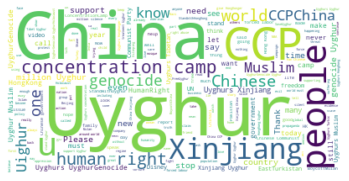

In [23]:
list_wc = []
for list_world in df["text_lemmatized"]:
    for world in list_world:
        list_wc.append(world)

wc = wordcloud.WordCloud(background_color="white", max_words=2000)
wc.generate(' '.join(list_wc))        
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

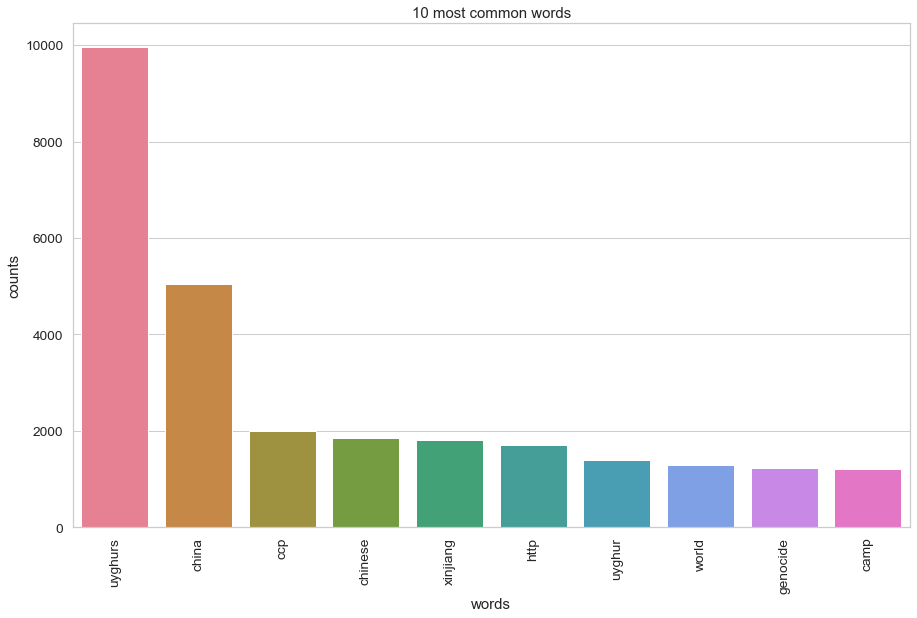

In [78]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer

sns.set_style('whitegrid')
%matplotlib inline
# Helper function

def plot_10_most_common_words(count_data, count_vectorizer):

    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df["text_lemmatized"].apply(lambda x: ' '.join(x)))
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

# LDA

In [63]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 4
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
results = lda.fit_transform(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
uyghurs china ccp xinjiang chinese genocide http disney world stand

Topic #1:
uyghurs china xinjiang muslims http bleeding genocide explosion world video

Topic #2:
uyghurs china chinese ccp camp world people uyghur million forced

Topic #3:
uyghurs china http xinjiang chinese uyghur hongkong uyghurgenocide ccp genocide


In [64]:
%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))


LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)

with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, "rb") as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

Wall time: 6min 20s


In [59]:
df["vector"] = pd.Series(list(results))

### text_tweets_h_Uyghurs 2020-09-30 2020-10-05

In [81]:
df_1 = pd.read_csv("text_tweets_h_Uyghurs" "2020-09-30" + "_" + "2020-10-05"  ".csv")

df_1["text_processed"] = df_1["text"].apply(lambda x: nltk.word_tokenize(x, language='english'))
df_1["text_processed_is_alpha"] = df_1["text_processed"].apply(lambda x: [word for word in x if word.isalpha()])
df_1["text_tokenized_wo_stopwords"] = df_1["text_processed_is_alpha"].apply(lambda x: [w for w in x if not w in stop_words])
df_1["text_lemmatized"] = df_1["text_tokenized_wo_stopwords"].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])
count_data_1 = count_vectorizer.transform(df_1["text_lemmatized"].apply(lambda x: ' '.join(x)))
df_1["score"] = pd.Series(list(lda.transform(count_data_1)))
for i in range(number_topics):
    df_1[str(i + 1) + "e cluster"] = df_1["score"].apply(lambda x: x[i])

In [91]:
df_1.sum()[7:]

1e cluster    137.337
2e cluster    60.1162
3e cluster    250.914
4e cluster    133.634
dtype: object

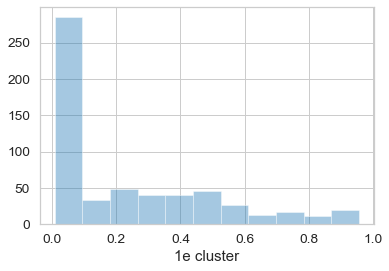

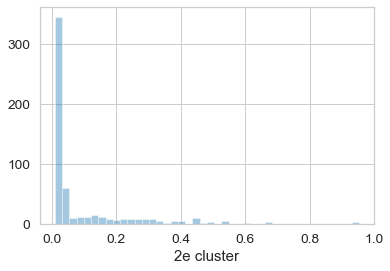

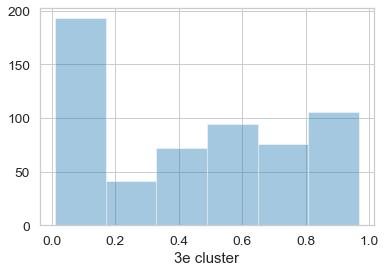

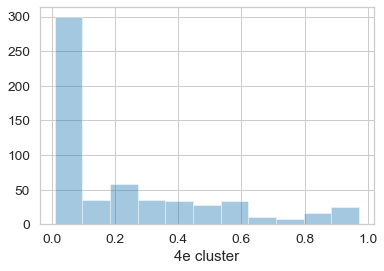

In [106]:
for i in range(number_topics):
    sns.distplot(df_1[str(i+1) + "e cluster"], kde = False)
    plt.show()

In [69]:
count_data_1

<582x3007 sparse matrix of type '<class 'numpy.int64'>'
	with 8530 stored elements in Compressed Sparse Row format>

In [70]:
df_1.head()

,Unnamed: 0,text,text_processed,text_processed_is_alpha,text_tokenized_wo_stopwords,text_lemmatized
0,0,The group want to raise the awareness of the t...,"[The, group, want, to, raise, the, awareness, ...","[The, group, want, to, raise, the, awareness, ...","[The, group, want, raise, awareness, threats, ...","[The, group, want, raise, awareness, threat, C..."
1,1,#Uyghurs prayed President Trump sign Uyghur Hu...,"[#, Uyghurs, prayed, President, Trump, sign, U...","[Uyghurs, prayed, President, Trump, sign, Uygh...","[Uyghurs, prayed, President, Trump, sign, Uygh...","[Uyghurs, prayed, President, Trump, sign, Uygh..."
2,2,The oppression against #Uyghurs by the #Chines...,"[The, oppression, against, #, Uyghurs, by, the...","[The, oppression, against, Uyghurs, by, the, C...","[The, oppression, Uyghurs, Chinese, communist,...","[The, oppression, Uyghurs, Chinese, communist,..."
3,3,#Uyghurs #Uighurs #Xinjiang \n(Pls also check ...,"[#, Uyghurs, #, Uighurs, #, Xinjiang, (, Pls, ...","[Uyghurs, Uighurs, Xinjiang, Pls, also, check,...","[Uyghurs, Uighurs, Xinjiang, Pls, also, check,...","[Uyghurs, Uighurs, Xinjiang, Pls, also, check,..."
4,4,World Uyghur Congress leader visits shrine hon...,"[World, Uyghur, Congress, leader, visits, shri...","[World, Uyghur, Congress, leader, visits, shri...","[World, Uyghur, Congress, leader, visits, shri...","[World, Uyghur, Congress, leader, visit, shrin..."
